In [22]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [3]:
returnsant=pd.read_csv('returnsant.csv').drop('perf_date',axis=1)

In [193]:
returnsant.head()

,Hedge Fund,Factor - Low Risk,Factor - Value vs Growth,Factor - Fixed Income Carry,Factor - Local Equity,Factor - Trend Following,Factor - Commodities,Factor - Equity,Factor - Foreign Exchange Carry,Factor - Small Cap,Factor - Emerging Markets,Factor - Foreign Currency,Factor - Local Inflation,Factor - Equity Short Volatility,Factor - Credit,Factor - Interest Rates,Factor - Crowding,Factor - Momentum,Factor - Quality
0,0.0088,-0.027273,-0.012632,0.006403,-0.004653,0.027924,-0.003037,0.028032,-0.003735,0.025687,0.022615,-0.028750,0.009925,0.008125,0.019915,-0.006530,0.000020,0.030207,-0.000626
1,0.0083,0.036038,0.012010,-0.021316,0.012622,0.008689,-0.021246,0.005813,-0.005763,-0.005889,0.023366,0.005920,-0.005564,0.016747,0.003766,-0.002498,-0.000645,-0.014214,-0.002882
2,0.0242,0.000317,-0.001646,-0.006682,0.012469,0.026956,-0.002117,0.013999,-0.057169,0.012512,-0.039254,0.004665,0.015684,0.005389,0.000358,-0.014418,-0.019313,0.008646,0.009902
3,0.0146,-0.003192,0.002147,0.020273,0.004506,0.064467,0.006392,0.013055,0.005360,-0.007250,-0.006414,-0.021774,0.026725,0.006107,0.008849,-0.013622,-0.017431,0.017130,0.008526
4,-0.0325,0.015825,0.019188,0.029589,-0.011379,-0.026691,0.006959,-0.052638,-0.012393,-0.015368,-0.054605,-0.036699,0.016301,0.006757,-0.000345,0.005999,0.011866,0.001438,-0.001415


In [9]:
crowding=returnsant['Factor - Crowding'].values

In [32]:
newcrowding=(crowding[25:])

In [33]:
newcrowding

array([ 2.9188000e-04,  2.6491100e-05, -5.5358300e-04,  9.1350170e-03,
        4.8280350e-03,  2.3211790e-03,  1.4943300e-03, -5.2240115e-02,
        1.1084472e-02,  6.6145900e-03,  6.5665100e-04,  2.7509840e-02,
        1.1642236e-02, -5.7781200e-03, -2.0111385e-02,  6.8480190e-03,
        8.0487940e-03,  2.0376660e-03,  2.1619820e-03,  9.3529860e-03,
        1.0373429e-02,  7.2578020e-03,  9.1315400e-04,  9.0290150e-03,
        1.0642858e-02, -6.1721300e-04, -3.9693370e-03,  3.2233600e-04,
        4.2468820e-03,  9.4639710e-03,  1.3097780e-02,  3.3475710e-03,
        1.2624543e-02,  5.8610700e-03,  9.7211340e-03,  2.7888720e-03,
       -1.9363770e-03, -1.5595830e-03,  1.2400983e-02,  1.0702132e-02,
        5.7527870e-03,  1.2793594e-02, -8.2541690e-03,  1.3617420e-02,
        7.2697570e-03,  9.1914970e-03,  1.7435760e-03,  8.0872600e-04,
        7.5506330e-03,  1.1239881e-02,  7.6223390e-03,  1.0138068e-02,
       -3.2333090e-03,  1.8067020e-02,  6.4510340e-03,  8.8283670e-03,
      

In [34]:
newcrowding=newcrowding[::-1]

In [35]:
newcrowding

array([-4.3589580e-03, -3.0538090e-03,  2.4205124e-02,  2.8112229e-02,
       -2.8357830e-03,  3.0484470e-03,  1.0329160e-02,  8.3629680e-03,
        1.5509719e-02, -2.5532910e-03,  1.0999667e-02,  1.7250094e-02,
        7.8232010e-03,  1.6775898e-02, -4.9555848e-02,  7.5467470e-03,
       -1.5507026e-02,  1.0925854e-02, -6.2348330e-03, -3.1517880e-03,
        2.9544690e-03, -1.0256510e-02, -3.2415690e-03, -8.4690760e-03,
       -1.3465282e-02, -2.1440130e-03, -2.6242710e-03,  2.1622455e-02,
       -2.1311587e-02, -4.8210860e-03, -6.7093090e-03, -5.1122440e-03,
       -1.5078450e-03, -3.0644830e-03, -6.5514440e-03,  6.0808200e-04,
        3.3492060e-03,  3.7677100e-04, -2.8556910e-03, -1.4902600e-03,
        1.0979980e-02,  7.2058320e-03, -8.3886380e-03,  3.8547700e-04,
        3.9093960e-03,  6.4970750e-03,  1.4234750e-03,  5.5320120e-03,
        4.6253160e-03, -2.6343840e-03,  9.5116980e-03,  1.8132990e-03,
        7.4682500e-04, -5.2997500e-04, -4.5391540e-03,  2.3153990e-03,
      

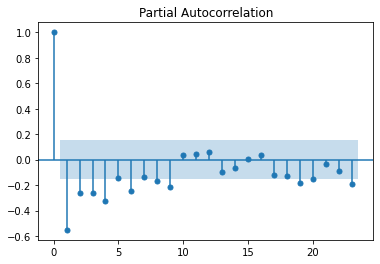

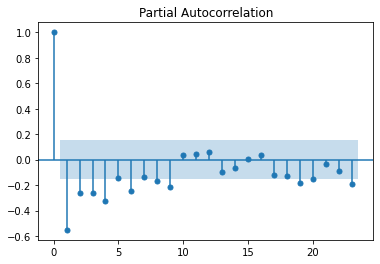

In [42]:
sm.graphics.tsa.plot_pacf(np.diff(newcrowding))

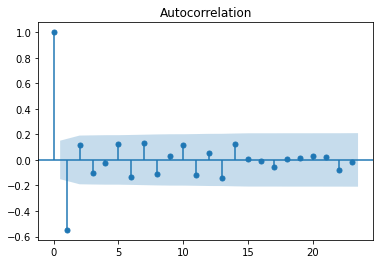

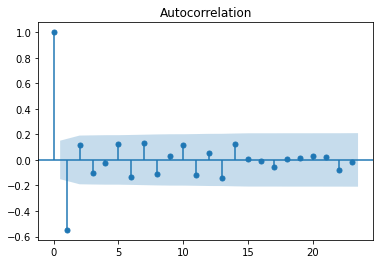

In [43]:
sm.graphics.tsa.plot_acf(np.diff(newcrowding))

In [102]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(newcrowding, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  169
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 543.388
Method:                       css-mle   S.D. of innovations              0.010
Date:                Mon, 01 Aug 2022   AIC                          -1080.776
Time:                        23:26:18   BIC                          -1071.387
Sample:                             1   HQIC                         -1076.966
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.954e-05    1.5e-05      1.307      0.191   -9.76e-06    4.88e-05
ma.L1.D.y     -1.0000      0.022    -45.719      0.000      -1.043      -0.957
                                    Roots           

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


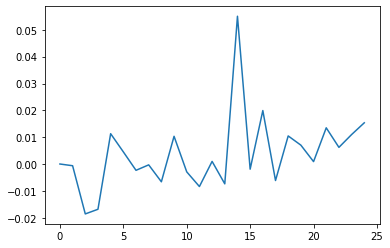

In [103]:
import matplotlib.pyplot as plt
results=model_fit.predict()[0:25]
plt.plot(results)

In [53]:
crowding[0:25]=results

In [54]:
crowding

array([ 1.95318068e-05, -6.45483784e-04, -1.93126621e-02, -1.74310282e-02,
        1.18663502e-02,  4.79080241e-03, -2.36210159e-03, -2.57872011e-04,
       -6.80242713e-03,  1.07711796e-02, -2.97534972e-03, -8.64838495e-03,
        1.06418934e-03, -7.61142256e-03,  5.70998845e-02, -1.95504701e-03,
        2.06693704e-02, -6.33508756e-03,  1.08668749e-02,  7.30703146e-03,
        9.52667066e-04,  1.39944873e-02,  6.45306661e-03,  1.13933251e-02,
        1.59250032e-02,  2.91880000e-04,  2.64911000e-05, -5.53583000e-04,
        9.13501700e-03,  4.82803500e-03,  2.32117900e-03,  1.49433000e-03,
       -5.22401150e-02,  1.10844720e-02,  6.61459000e-03,  6.56651000e-04,
        2.75098400e-02,  1.16422360e-02, -5.77812000e-03, -2.01113850e-02,
        6.84801900e-03,  8.04879400e-03,  2.03766600e-03,  2.16198200e-03,
        9.35298600e-03,  1.03734290e-02,  7.25780200e-03,  9.13154000e-04,
        9.02901500e-03,  1.06428580e-02, -6.17213000e-04, -3.96933700e-03,
        3.22336000e-04,  

In [59]:
returnsant['Factor - Crowding'][0:25]=results

In [60]:
returnsant.head(25)

,Hedge Fund,Factor - Low Risk,Factor - Value vs Growth,Factor - Fixed Income Carry,Factor - Local Equity,Factor - Trend Following,Factor - Commodities,Factor - Equity,Factor - Foreign Exchange Carry,Factor - Small Cap,Factor - Emerging Markets,Factor - Foreign Currency,Factor - Local Inflation,Factor - Equity Short Volatility,Factor - Credit,Factor - Interest Rates,Factor - Crowding,Factor - Momentum,Factor - Quality
0,0.0088,-0.027273,-0.012632,0.006403,-0.004653,0.027924,-0.003037,0.028032,-0.003735,0.025687,0.022615,-0.028750,0.009925,0.008125,0.019915,-0.006530,0.000020,0.030207,-0.000626
1,0.0083,0.036038,0.012010,-0.021316,0.012622,0.008689,-0.021246,0.005813,-0.005763,-0.005889,0.023366,0.005920,-0.005564,0.016747,0.003766,-0.002498,-0.000645,-0.014214,-0.002882
2,0.0242,0.000317,-0.001646,-0.006682,0.012469,0.026956,-0.002117,0.013999,-0.057169,0.012512,-0.039254,0.004665,0.015684,0.005389,0.000358,-0.014418,-0.019313,0.008646,0.009902
3,0.0146,-0.003192,0.002147,0.020273,0.004506,0.064467,0.006392,0.013055,0.005360,-0.007250,-0.006414,-0.021774,0.026725,0.006107,0.008849,-0.013622,-0.017431,0.017130,0.008526
4,-0.0325,0.015825,0.019188,0.029589,-0.011379,-0.026691,0.006959,-0.052638,-0.012393,-0.015368,-0.054605,-0.036699,0.016301,0.006757,-0.000345,0.005999,0.011866,0.001438,-0.001415
5,0.0029,0.010072,0.009627,0.030382,0.019498,-0.015734,-0.014250,-0.006736,-0.003904,-0.015182,-0.002810,0.008443,0.005050,0.040368,-0.025039,-0.006258,0.004791,0.004462,0.005680
6,0.0192,0.042557,0.035833,0.004876,0.013868,-0.019158,0.008990,0.012305,0.022160,-0.037096,0.017756,-0.014787,0.033305,0.020897,0.025873,0.008558,-0.002362,0.011642,-0.001137
7,0.0163,0.011583,-0.000827,-0.002797,-0.020176,0.001702,-0.014355,0.020544,0.028562,0.006363,0.000235,-0.028813,0.025968,0.001508,-0.007470,0.013663,-0.000258,-0.033456,0.008943
8,0.0111,0.036836,0.015418,-0.010642,-0.007034,0.006149,-0.021617,0.016057,0.013978,-0.005285,-0.001453,0.010302,-0.014355,0.009681,0.008650,0.006928,-0.006802,-0.014551,0.016641
9,0.0383,0.004861,0.005281,0.010740,-0.001497,-0.004061,0.013716,0.027007,0.019015,-0.000970,-0.002469,-0.014366,0.027804,-0.003349,0.033653,-0.001852,0.010771,0.003406,-0.003528


In [68]:
indexs=returnsant['Factor - Quality'].values.argsort()
returnsant['Factor - Quality'][indexs].head(20)


39    -0.040496
40    -0.034837
96    -0.032745
123   -0.029291
178   -0.028629
72    -0.026884
181   -0.024968
188   -0.024158
83    -0.023342
173   -0.022014
144   -0.019820
180   -0.019610
111   -0.018407
137   -0.013820
171   -0.013076
35    -0.012809
192   -0.012684
177   -0.012556
169   -0.012427
81    -0.011236
Name: Factor - Quality, dtype: float64

In [73]:
indexs=returnsant['Factor - Interest Rates'].argmax()
returnsant['Factor - Quality'][indexs]

-0.010775

In [55]:
from statsmodels.tsa.stattools import adfuller
def stationarity(df):
    pvalue=[]
    i=0
    for feature in (df.columns):
        pvalue.append(adfuller(df[feature].values)[1])
        if  pvalue[i] <= 0.05:
            print("Stationary feature {} with p-value {}".format(feature,pvalue[i]))
            i+=1
        else:
            print("Non-Stationary feature {} with p-value {}".format(feature,pvalue[i]))
            i+=1

In [75]:
import numpy as np
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    
    # Generate outliers
    indexs=[]
    i=0
    for outlier in data:
        # Set upper and lower limit to 3 standard deviation
        data_std = np.std(data)
        data_mean = np.median(data)
        cut_off = data_std * 3
    
        lower_limit  = data_mean - cut_off 
        upper_limit = data_mean + cut_off
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
            indexs.append(i)
            data[i]=data_mean
        i+=1
    print("The anomalies are at indexs {} with values {}".format(indexs, anomalies))
    return data

In [76]:
find_anomalies(returnsant['Factor - Value vs Growth'])

The anomalies are at indexs [179, 180, 181, 192] with values [-12739.63101, 10069.79161, 31963.20149, 0.126822666]


0     -0.012632
1      0.012010
2     -0.001646
3      0.002147
4      0.019188
         ...   
190    0.005199
191    0.044041
192   -0.000972
193    0.011823
194    0.011146
Name: Factor - Value vs Growth, Length: 195, dtype: float64

In [77]:
returnsant['Factor - Value vs Growth'].describe()

count    195.000000
mean      -0.000895
std        0.025233
min       -0.126148
25%       -0.015122
50%       -0.000972
75%        0.010633
max        0.090296
Name: Factor - Value vs Growth, dtype: float64

In [78]:
find_anomalies(returnsant['Factor - Interest Rates'])

The anomalies are at indexs [24, 25, 26, 34, 194] with values [23213.71104, 5867.505916, 3149.873353, 0.035962977, -0.028067551]


0     -0.006530
1     -0.002498
2     -0.014418
3     -0.013622
4      0.005999
         ...   
190    0.012773
191   -0.005114
192   -0.013568
193   -0.009306
194    0.002805
Name: Factor - Interest Rates, Length: 195, dtype: float64

In [94]:
find_anomalies(returnsant['Factor - Quality'])

The anomalies are at indexs [39, 120, 170] with values [-0.040495512, 0.058458421, 0.084839798]


0     -0.000626
1     -0.002882
2      0.009902
3      0.008526
4     -0.001415
         ...   
190    0.020969
191    0.019418
192   -0.012684
193   -0.009323
194   -0.000477
Name: Factor - Quality, Length: 195, dtype: float64

In [80]:
returnsant['Factor - Interest Rates'].describe()

count    195.000000
mean       0.002368
std        0.009687
min       -0.021461
25%       -0.003911
50%        0.002805
75%        0.008740
max        0.028664
Name: Factor - Interest Rates, dtype: float64

In [57]:
stationarity(returnsant)

Stationary feature Hedge Fund with p-value 4.436186712483304e-23
Stationary feature Factor - Low Risk with p-value 8.049517181736375e-21
Stationary feature Factor - Value vs Growth with p-value 5.002668716851679e-12
Stationary feature Factor - Fixed Income Carry with p-value 2.462921769096802e-25
Stationary feature Factor - Local Equity with p-value 6.9291295004938825e-09
Stationary feature Factor - Trend Following with p-value 1.6592042137754708e-05
Stationary feature Factor - Commodities with p-value 2.963812192618041e-11
Stationary feature Factor - Equity with p-value 1.0260426689125895e-22
Stationary feature Factor - Foreign Exchange Carry with p-value 1.5171726683931426e-17
Stationary feature Factor - Small Cap with p-value 6.53273576126725e-25
Stationary feature Factor - Emerging Markets with p-value 1.5780692653553101e-28
Stationary feature Factor - Foreign Currency with p-value 7.969419703887611e-13
Stationary feature Factor - Local Inflation with p-value 2.914482747382117e-25


/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


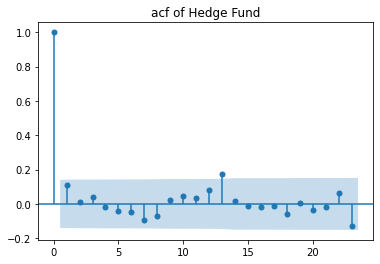

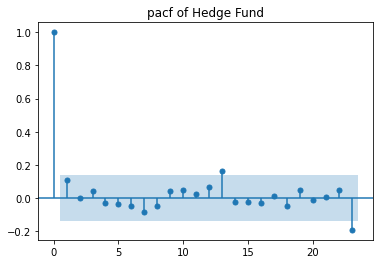

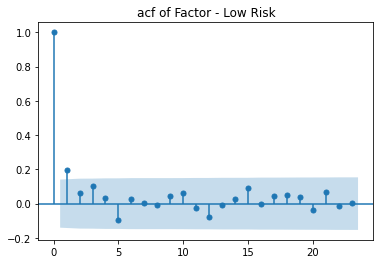

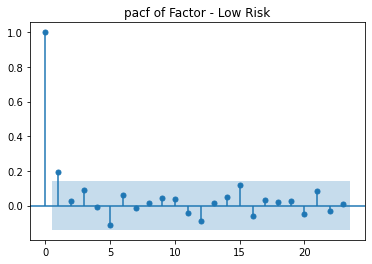

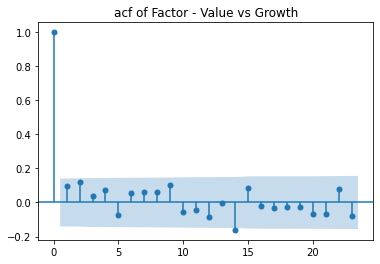

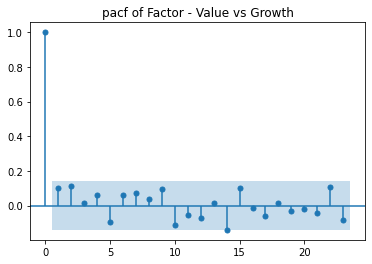

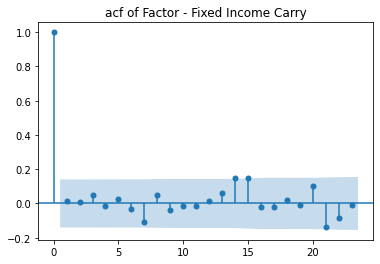

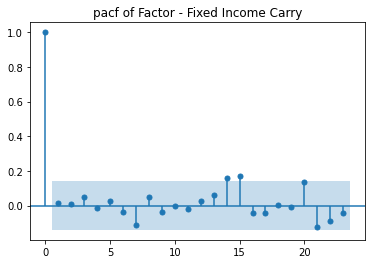

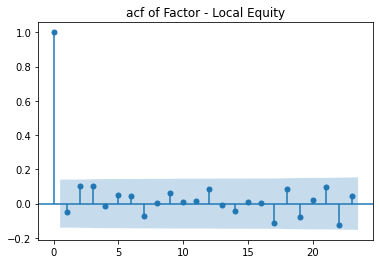

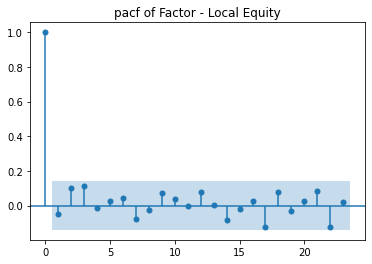

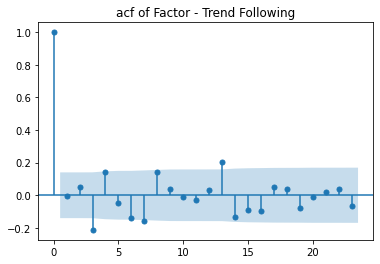

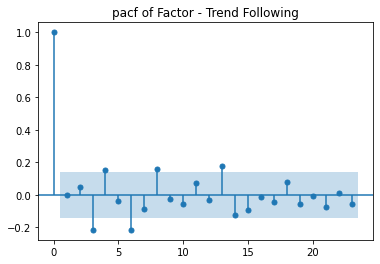

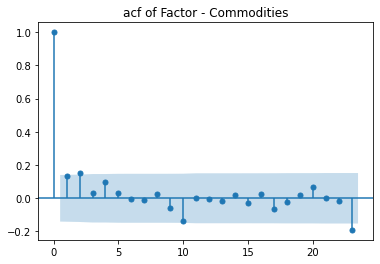

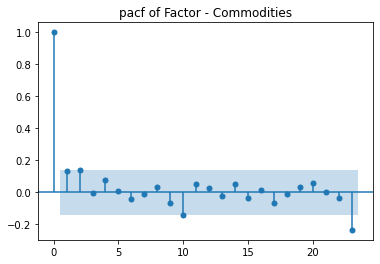

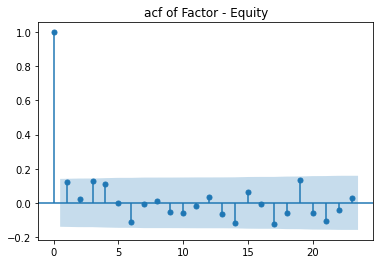

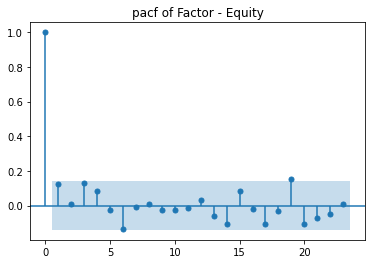

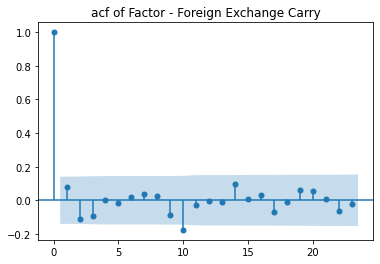

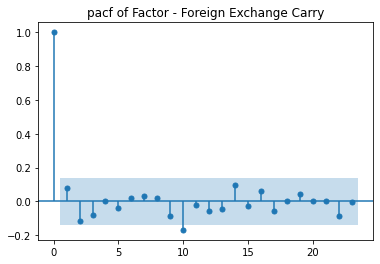

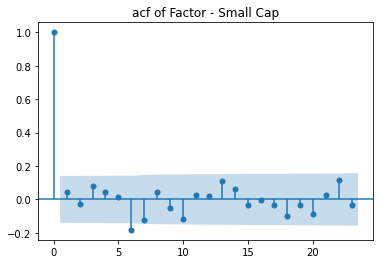

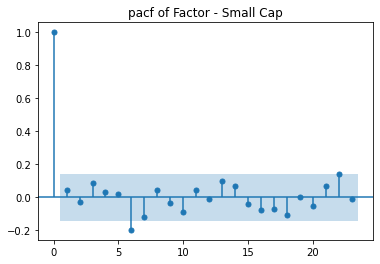

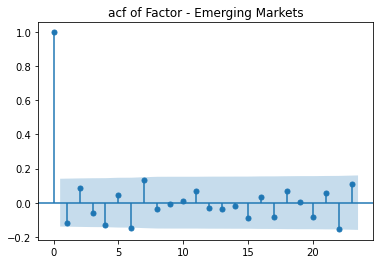

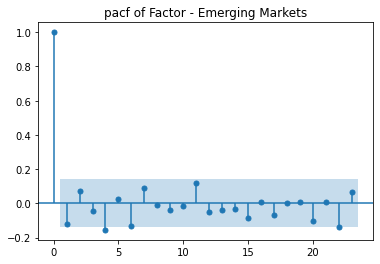

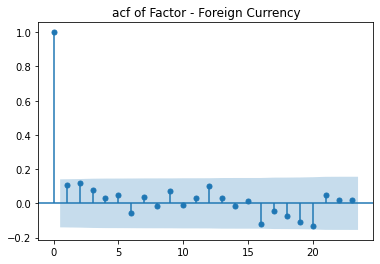

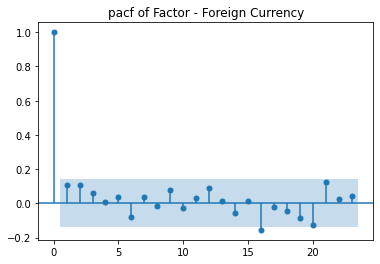

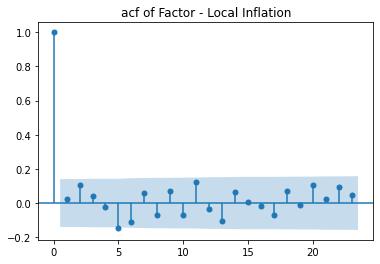

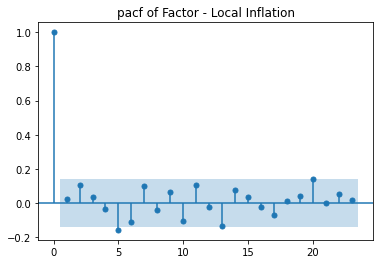

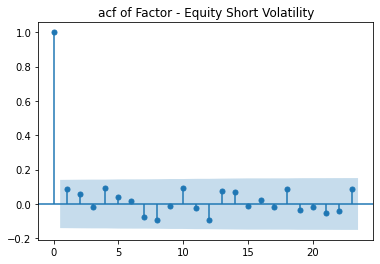

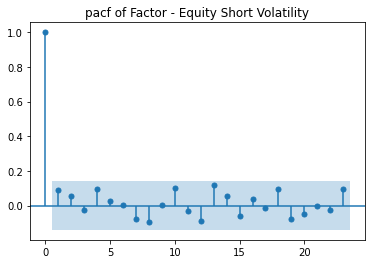

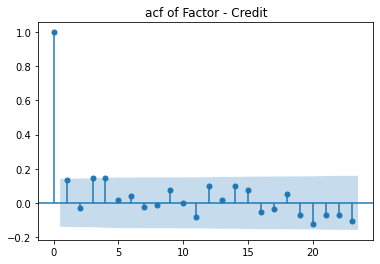

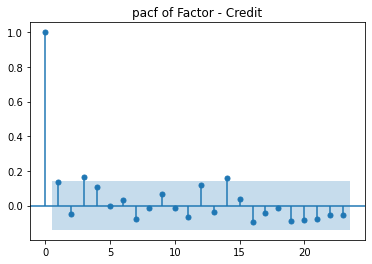

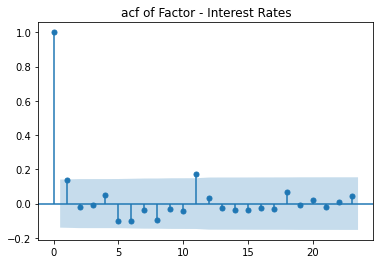

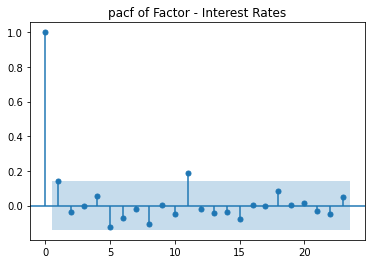

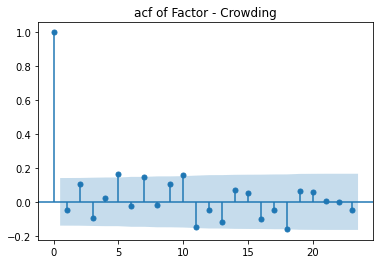

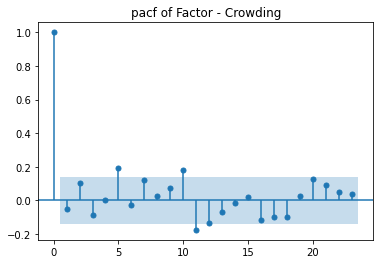

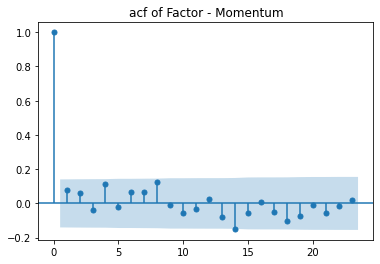

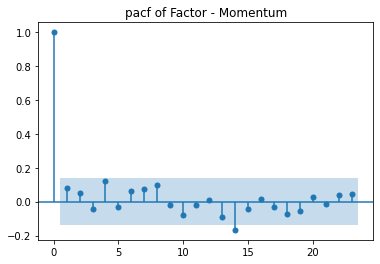

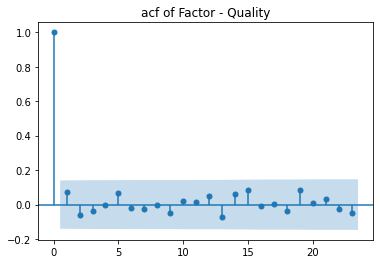

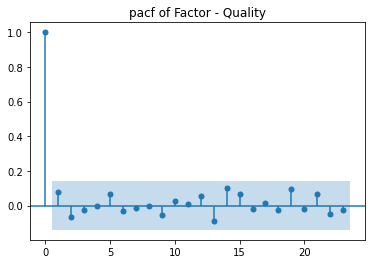

In [105]:
for feature in returnsant.columns:
    sm.graphics.tsa.plot_acf((returnsant[feature].values).reshape(-1,1),title='acf of '+feature)
    sm.graphics.tsa.plot_pacf((returnsant[feature].values).reshape(-1,1),title='pacf of '+feature)

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


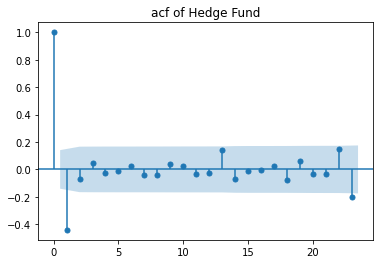

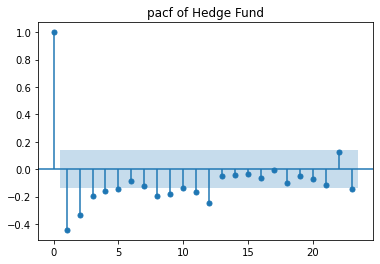

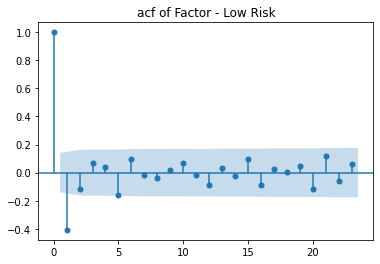

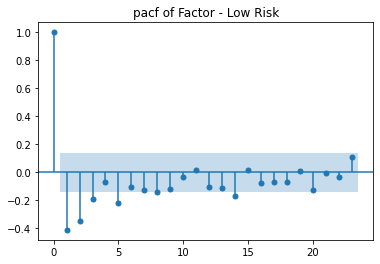

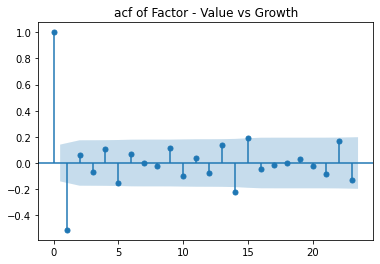

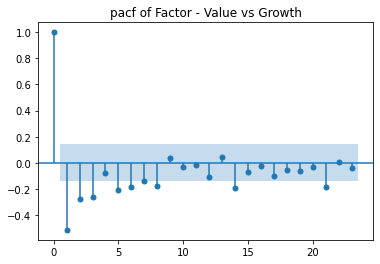

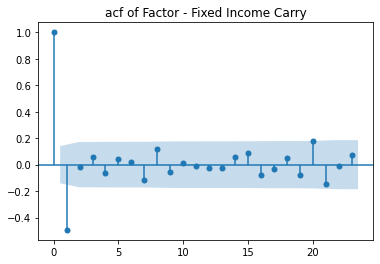

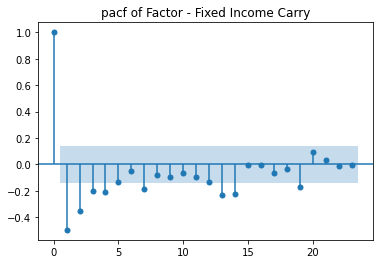

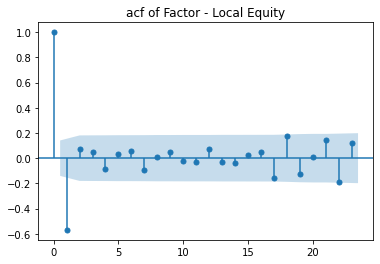

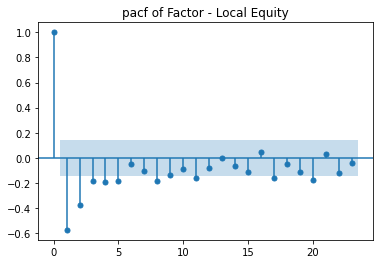

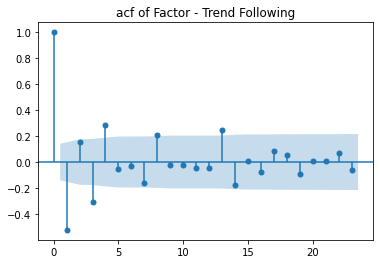

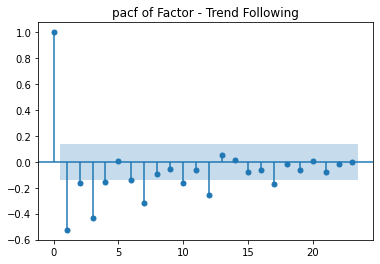

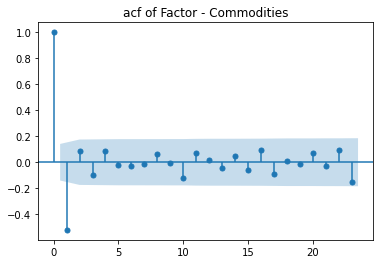

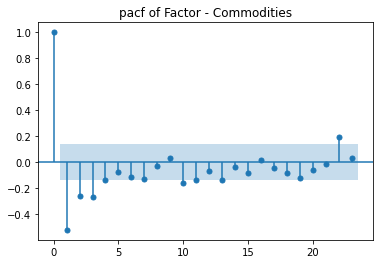

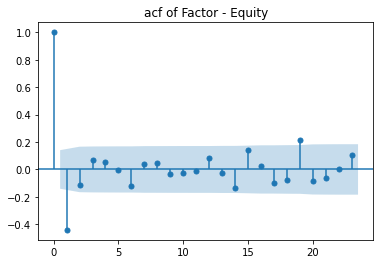

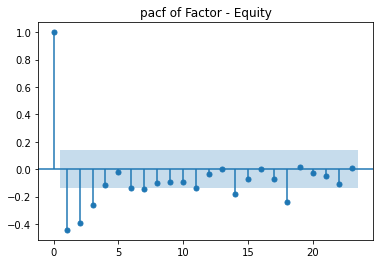

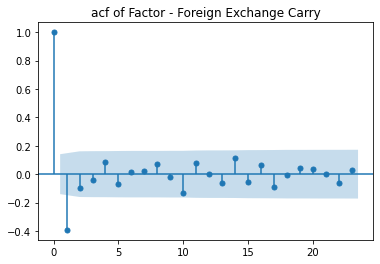

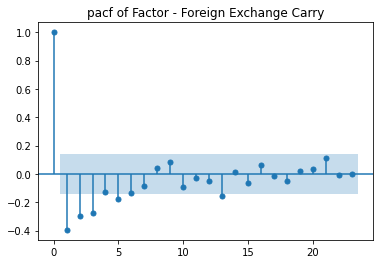

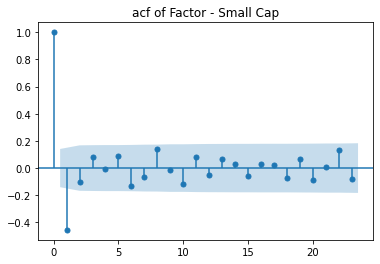

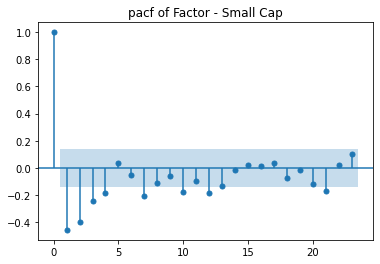

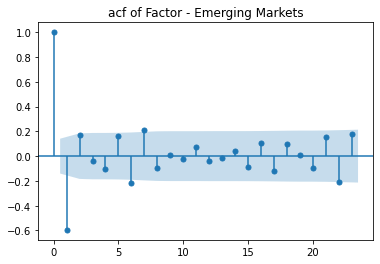

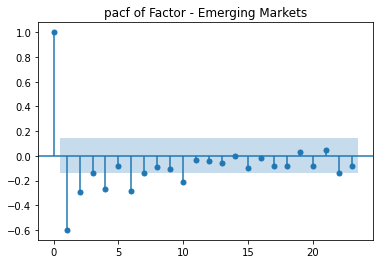

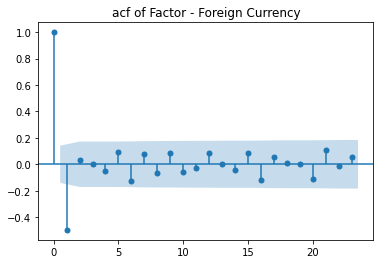

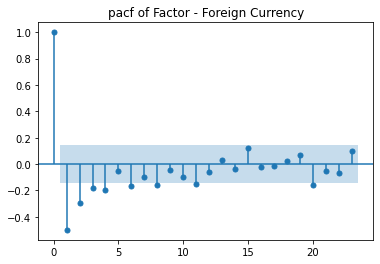

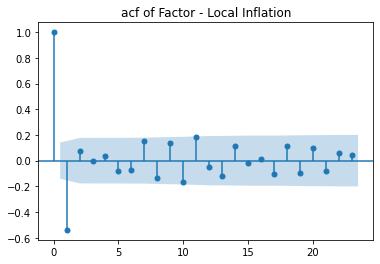

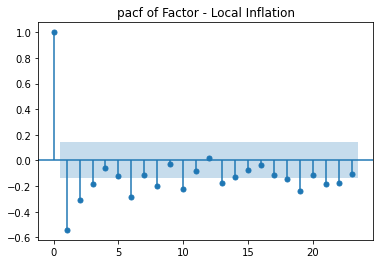

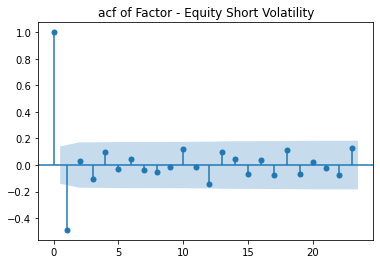

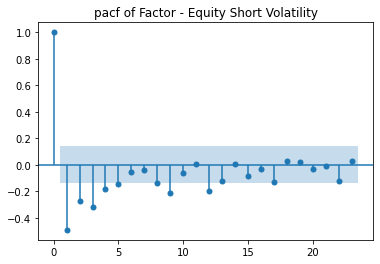

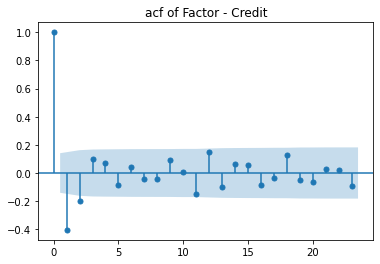

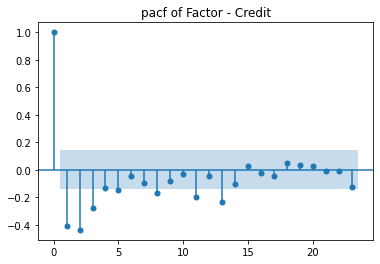

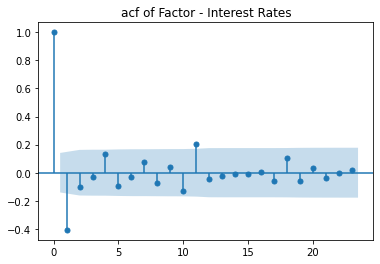

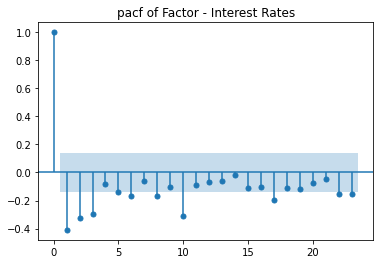

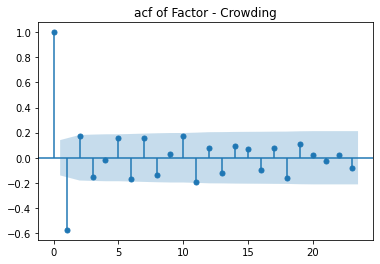

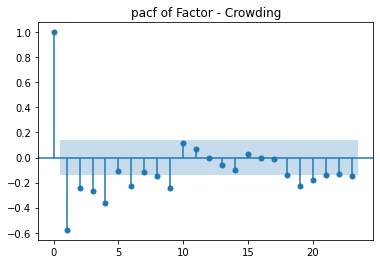

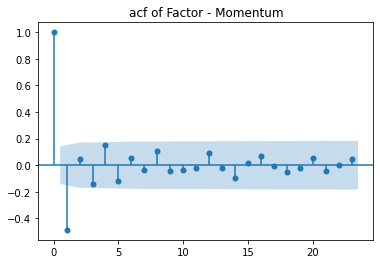

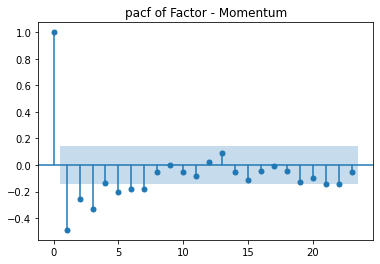

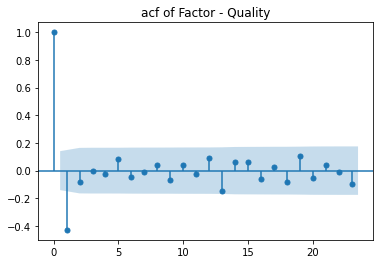

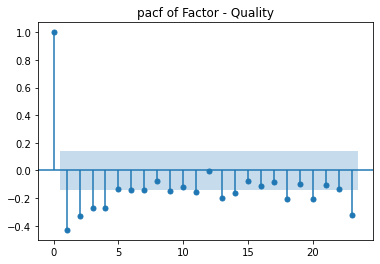

In [104]:
for feature in returnsant.columns:
    sm.graphics.tsa.plot_acf(np.diff(returnsant[feature].values).reshape(-1,1),title='acf of '+feature)
    sm.graphics.tsa.plot_pacf(np.diff(returnsant[feature].values).reshape(-1,1),title='pacf of '+feature)

## ACF order 


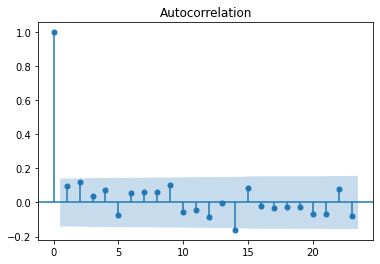

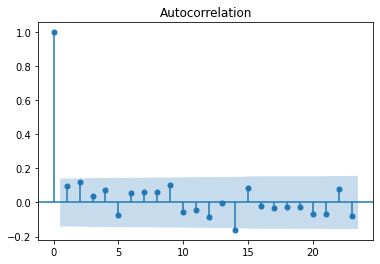

In [83]:
sm.graphics.tsa.plot_acf(returnsant['Factor - Value vs Growth'])


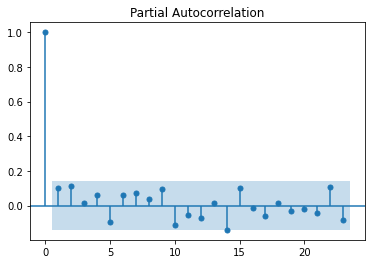

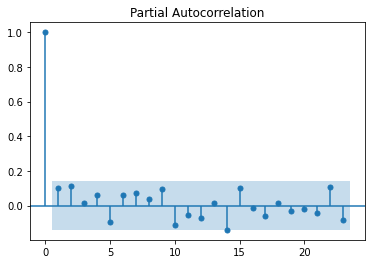

In [84]:
sm.graphics.tsa.plot_pacf(returnsant['Factor - Value vs Growth'])

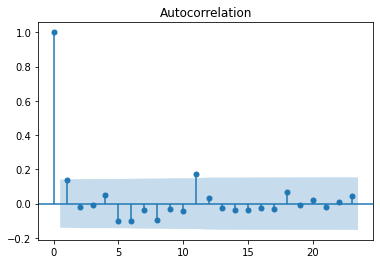

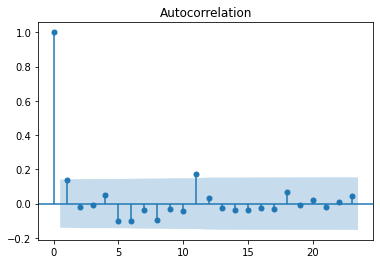

In [95]:
sm.graphics.tsa.plot_acf(returnsant['Factor - Interest Rates'])

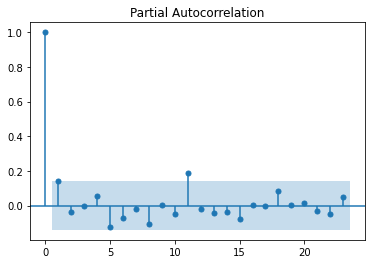

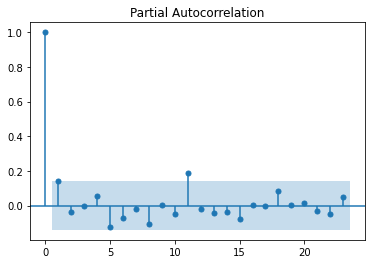

In [96]:
sm.graphics.tsa.plot_pacf(returnsant['Factor - Interest Rates'])

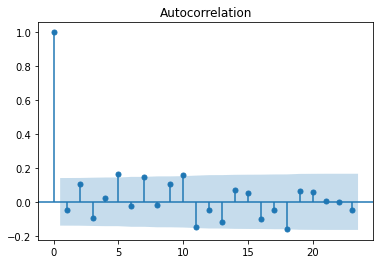

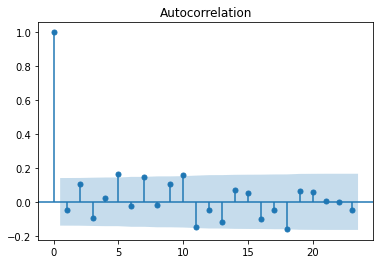

In [313]:
sm.graphics.tsa.plot_acf((returnsant['Factor - Crowding']).values)

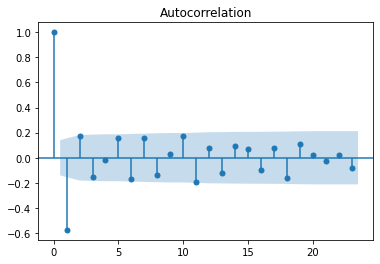

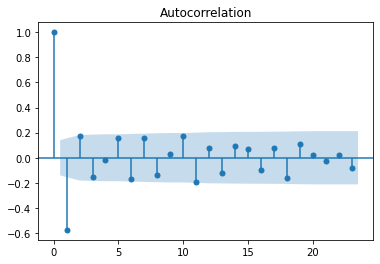

In [310]:
sm.graphics.tsa.plot_acf(np.diff((returnsant['Factor - Crowding'].values)))

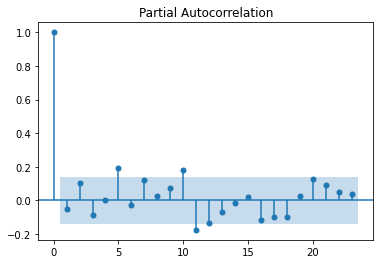

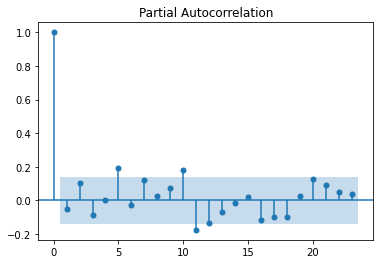

In [312]:
sm.graphics.tsa.plot_pacf(returnsant['Factor - Crowding'].values)

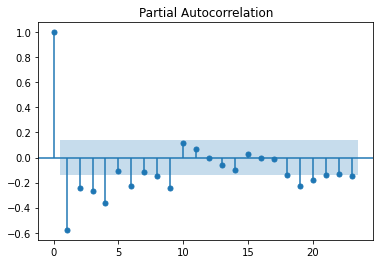

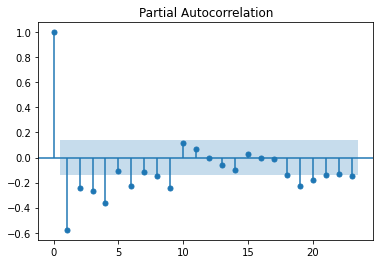

In [311]:
sm.graphics.tsa.plot_pacf(np.diff((returnsant['Factor - Crowding'].values)))

In [212]:
model_fitted=[]
predictions=[]
fit=[]
for i, feature in enumerate(returnsant.columns):
    model_fitted.append(ARIMA(returnsant[feature].values,exog=returnsant.drop(feature,axis=1).values,order=(1,1,1)))
    fit.append(model_fitted[i].fit(disp=0 ))
    predictions.append(model_fitted[i].predict(returnsant[feature] )[0:20])
    

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/s

In [183]:
predictions

[array([0.00848712, 0.00792927, 0.00888625, 0.00835964, 0.00958993,
        0.00964974, 0.01128218, 0.01033589, 0.01169465, 0.00877866,
        0.00964415, 0.00983136, 0.01006763, 0.01102809, 0.00933902,
        0.00881042, 0.00935589, 0.00775327, 0.00512942, 0.01199344]),
 array([-0.02677135, -0.02719595, -0.02685584, -0.03089273, -0.02687572,
        -0.02492433, -0.02544672, -0.02711231, -0.02390817, -0.0266781 ,
        -0.02697726, -0.02601398, -0.02489519, -0.02835528, -0.02680518,
        -0.02601411, -0.02769505, -0.02744918, -0.0317826 , -0.02419937]),
 array([-0.01288218, -0.01311224, -0.01269173, -0.01400465, -0.01284328,
        -0.01245879, -0.01336314, -0.0135361 , -0.01181899, -0.01245001,
        -0.01346327, -0.01300653, -0.01118029, -0.01286595, -0.01330885,
        -0.01258269, -0.01351962, -0.01265072, -0.01456921, -0.01141209]),
 array([0.00625644, 0.00781379, 0.00827798, 0.00596108, 0.00613153,
        0.00533465, 0.00285316, 0.00530302, 0.00511224, 0.00560608,
  

In [217]:
!pip install pyramid

     |████████████████████████████████| 246 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 114 kB 287 kB/s eta 0:00:01


In [222]:
!pip install pmdarima

     |████████████████████████████████| 604 kB 1.6 MB/s eta 0:00:01


In [245]:
Arima_model=[ ]
res=[]
from pmdarima.arima import auto_arima
for i, feature in enumerate(returnsant.columns):
    Arima_model.append(auto_arima(returnsant[feature][0:160],returnsant.drop(feature,axis=1)[0:160], start_p=1, start_q=1, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=4, seasonal=True, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30))
    

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[4]             : AIC=-596.393, Time=0.62 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=-525.243, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=-612.625, Time=0.73 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=-682.205, Time=0.83 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=-603.928, Time=0.53 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=-673.157, Time=0.92 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=-677.571, Time=1.17 sec
 ARIMA(0,1,1)(1,1,0)[4]             : AIC=-637.000, Time=0.77 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=inf, Time=1.27 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=-611.209, Time=0.69 sec
 ARIMA(1,1,1)(0,1,1)[4]             : AIC=-673.880, Time=0.90 sec
 ARIMA(0,1,2)(0,1,1)[4]             : AIC=-676.101, Time=0.89 sec
 ARIMA(1,1,0)(0,1,1)[4]             : AIC=-638.248, Time=0.75 sec
 ARIMA(1,1,2)(0,1,1)[4]             : AIC=-677.935, Time=0.92 sec
 ARIMA(0,1,1)(0,1,1)[4] intercept   : 

In [270]:
res=[]
for i, feature in enumerate(returnsant.columns):
    res.append(Arima_model[i].resid())

In [281]:
res=np.array(res)
res.shape = (160,19)

In [280]:
160 *19

3040

In [287]:
predicts=[]
for i, feature in enumerate(returnsant.columns):
    predicts.append(Arima_model[i].predict(34,returnsant.drop(feature, axis=1)[:34]))

In [288]:
predicts=np.array(predicts)
predicts.shape=(34,19)

In [289]:
((returnsant[160:194]-predicts)*100)/(returnsant[160:194])

,Hedge Fund,Factor - Low Risk,Factor - Value vs Growth,Factor - Fixed Income Carry,Factor - Local Equity,Factor - Trend Following,Factor - Commodities,Factor - Equity,Factor - Foreign Exchange Carry,Factor - Small Cap,Factor - Emerging Markets,Factor - Foreign Currency,Factor - Local Inflation,Factor - Equity Short Volatility,Factor - Credit,Factor - Interest Rates,Factor - Crowding,Factor - Momentum,Factor - Quality
160,-415.119022,251.207121,165.011973,69.382401,0.087055,865.105306,109.322897,-45.216976,-3.030835,-4.695451,296.277757,-13.325662,351.026175,-9.778451,127.537089,1585.647952,437.775718,36.797460,-49.004729
161,278.640110,-15.154694,859.180421,320.723008,-3188.838408,318.430808,203.318046,365.933312,491.845389,593.509469,238.449215,291.816172,113.045426,1503.103356,349.940635,34.091357,92.270028,38.238260,30.325539
162,340.363988,-45.286497,-96.846177,-42.283850,347.987554,74.230430,83.822048,39.544642,191.387440,93.587080,-21.044608,69.937988,-69.361863,96.247052,113.914203,1032.315319,-99.745803,115.312396,-417.419760
163,75.666727,-20.334902,79.909251,-107.569066,81.786622,44.852821,291.658753,-147.203672,442.142295,-357.550183,158.910760,430.318336,-79.779986,196.518574,471.895294,-381.540100,126.935901,73.867347,-29.098049
164,51.911874,381.355777,457.393098,90.981078,188.687285,58.147006,322.318611,117.773048,497.111465,41.312928,446.183498,166.298451,201.657760,-1331.814244,169.523374,-238.171115,646.567107,3287.887773,115.708943
165,66.268575,171.902428,282.701179,-68.628451,-149.069296,785.814729,176.557027,123.093103,104.858857,94.895516,121.982434,-1.426575,126.910439,171.696564,68.809127,-1455.891020,144.492943,123.746095,148.800562
166,109.613699,88.532552,288.164473,74.983224,130.484789,79.680994,458.243746,78.644346,79.769151,283.337009,93.750773,153.101856,12.806632,-56.274505,98.007720,115.204976,120.733836,152.655802,-2.227001
167,80.220331,46.415796,-44.473310,51.704499,75.551358,187.991698,85.667007,89.608084,94.031440,59.699425,155.680039,147.233200,387.904927,81.765076,551.595500,164.880502,79.158302,132.246715,120.866630
168,101.354367,177.427650,48.862952,-11.625948,115.354365,60.822957,99.297405,423.459924,294.371247,128.156856,194.423737,49.663390,34.576337,-37.574719,173.172592,-65.108819,613.177329,64.675585,1858.174171
169,190.549358,119.084373,121.696570,-207.074877,31.278427,-3555.007470,-284.735983,105.206773,333.578102,36.387869,108.401559,113.409796,172.252104,63.649286,97.286099,158.121614,-885.937367,277.068968,232.951770


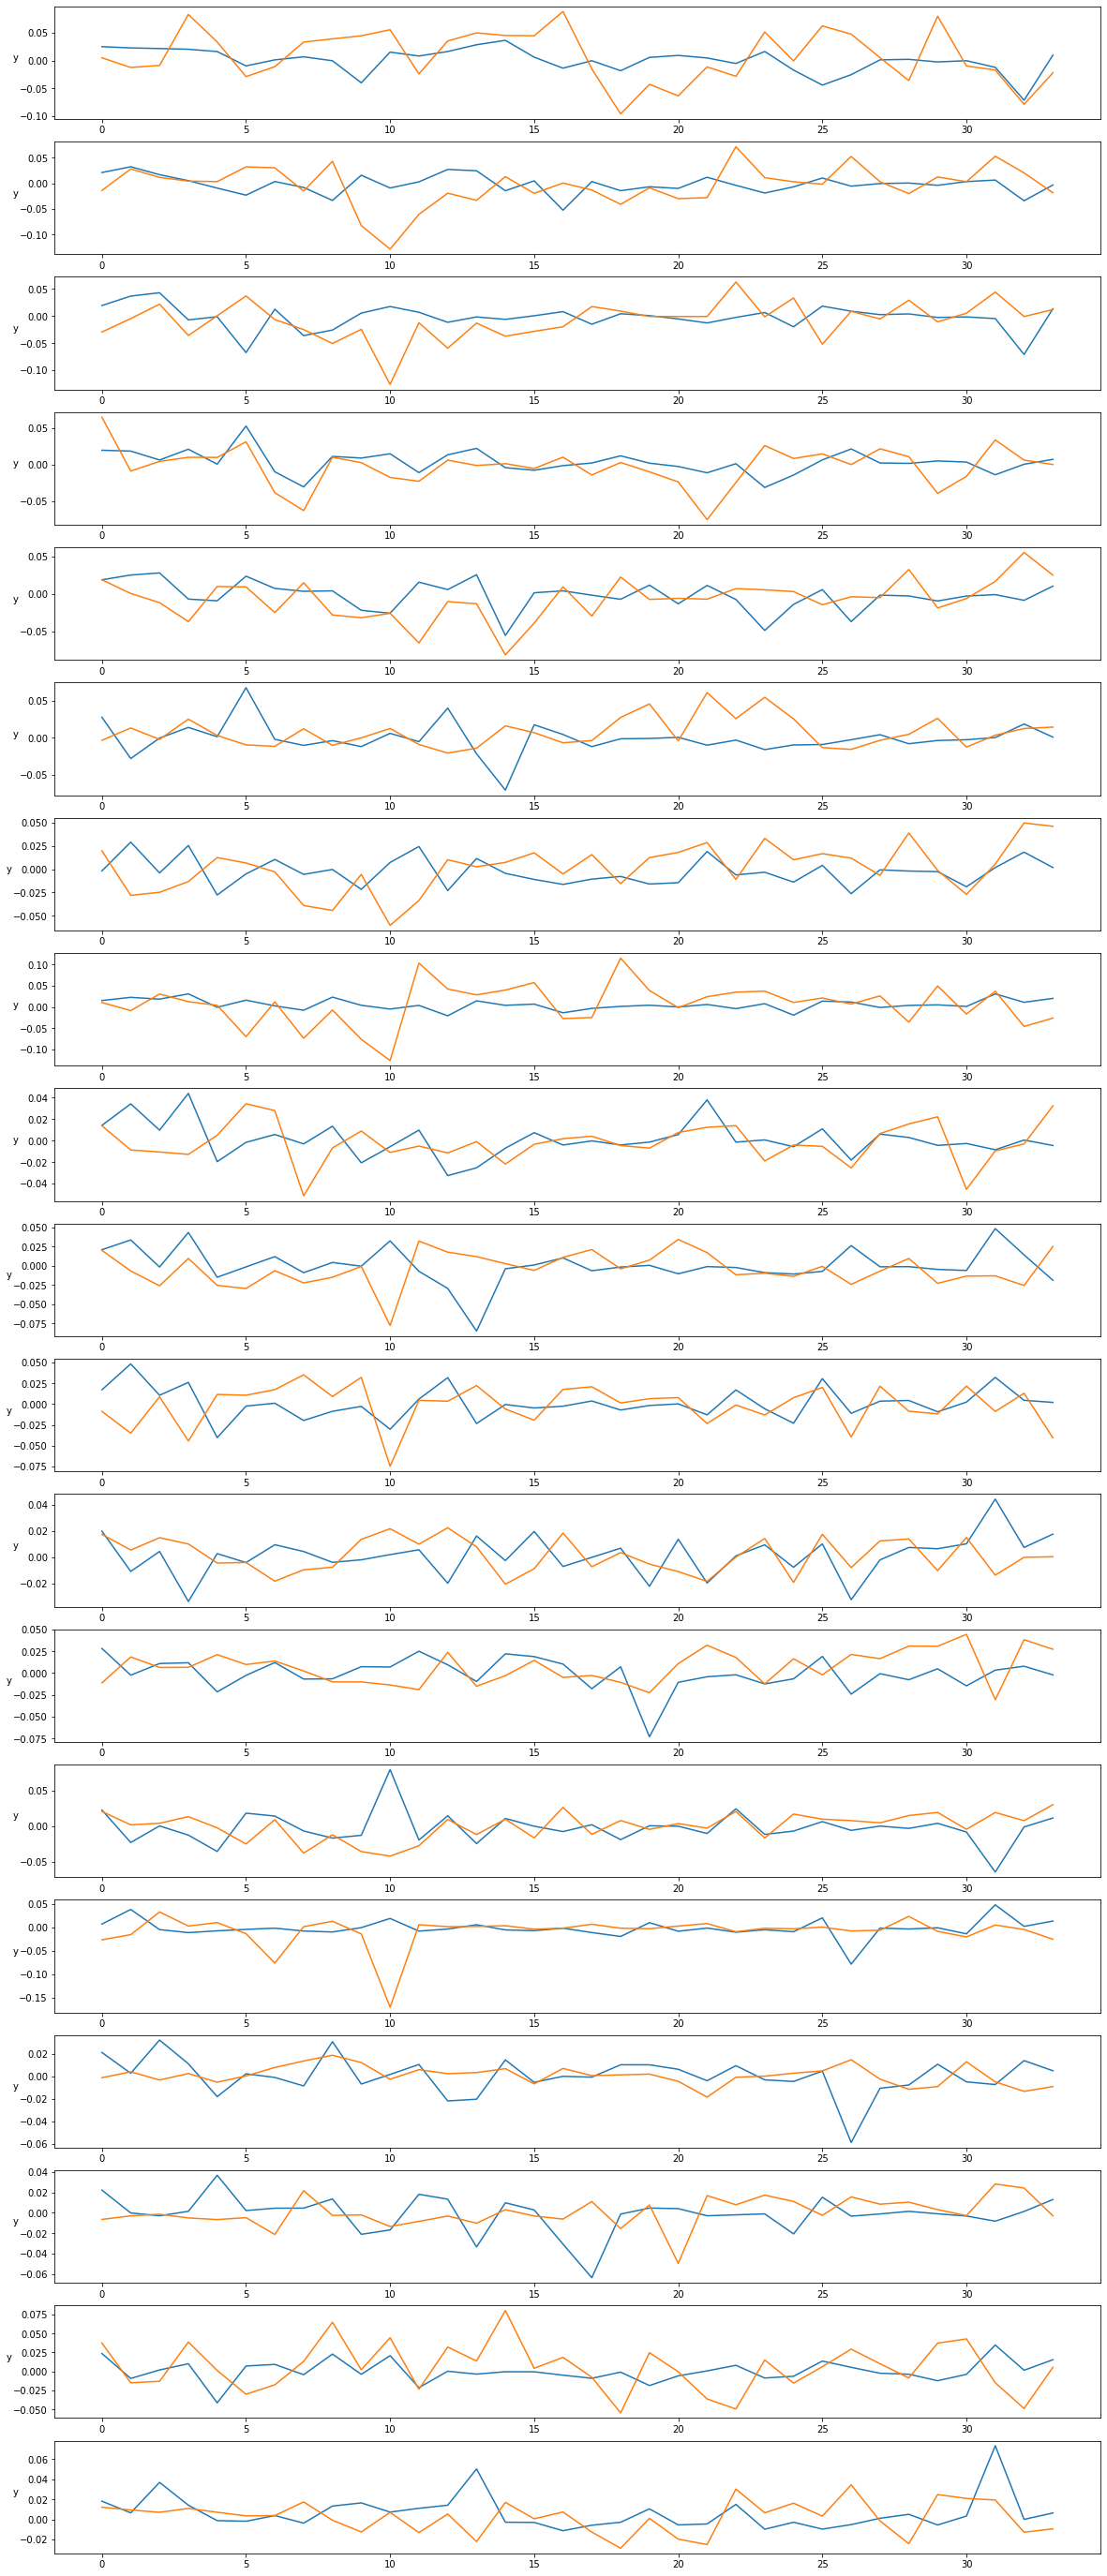

In [379]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(19, 1)
fig.set_figheight(50)
fig.set_figwidth(20)
for i, feature in enumerate(returnsant.columns):

    axs[i].plot(np.arange(0,34),predicts[:,i])
    axs[i].plot(np.arange(0,34),returnsant.iloc[160:194,i])
    

    axs[i].set_ylabel('y',rotation='horizontal')

In [322]:
(predicts[:,0] - returnsant.iloc[160:194,0])*100/returnsant.iloc[160:194,0] 

160     415.119022
161    -278.640110
162    -340.363988
163     -75.666727
164     -51.911874
165     -66.268575
166    -109.613699
167     -80.220331
168    -101.354367
169    -190.549358
170     -72.880781
171    -132.926561
172     -54.118855
173     -42.996348
174     -19.447402
175     -86.682070
176    -115.759486
177     -97.029794
178     -80.831472
179    -112.758972
180    -114.158812
181    -138.476742
182     -80.907462
183     -68.548910
184    2062.517124
185    -171.361539
186    -154.085000
187     -78.623654
188    -105.573632
189    -103.354683
190     -96.008495
191     -28.266494
192      -9.292055
193    -143.005012
Name: Hedge Fund, dtype: float64

In [255]:
predicts

array([[ 2.47257130e-02,  2.10157712e-02,  1.92268341e-02,
         1.99745459e-02,  1.90853937e-02,  2.74308615e-02,
        -1.83572598e-03,  1.52975817e-02,  1.41499025e-02,
         2.08726223e-02,  1.72526264e-02,  1.99374574e-02,
         2.81897173e-02,  2.24071794e-02,  7.24741133e-03,
         2.10430593e-02,  2.21291870e-02,  2.36117331e-02,
         1.82198170e-02],
       [ 2.25086538e-02,  3.22174885e-02,  3.66863993e-02,
         1.87875760e-02,  2.54611674e-02, -2.82762002e-02,
         2.90799696e-02,  2.27274081e-02,  3.41565709e-02,
         3.35811924e-02,  4.84606380e-02, -1.07074626e-02,
        -2.41006131e-03, -2.30229898e-02,  3.83950181e-02,
         2.52413428e-03, -2.36883673e-04, -9.23127900e-03,
         6.58405332e-03],
       [ 2.13923949e-02,  1.68220029e-02,  4.28066835e-02,
         6.60217270e-03,  2.82753797e-02, -6.13168624e-04,
        -4.02237441e-03,  1.84834423e-02,  9.67943233e-03,
        -1.67509284e-03,  1.06810319e-02,  4.50144396e-03,
    

In [284]:
import statsmodels.stats.api as sms
pagan=[]
for i, feature in enumerate(returnsant.columns):
    print(len(fit[i].resid))
    pagan.append(sms.diagnostic.het_breuschpagan(Arima_model[i].resid(),returnsant.drop(feature,axis=1)[0:160],robust=False)[1])

194
194
194
194
194
194
194
194
194
194
194
194
194
194
194
194
194
194
194


In [307]:
returnsant['Factor - Crowding'][0:25]

0     0.000020
1    -0.000645
2    -0.019313
3    -0.017431
4     0.011866
5     0.004791
6    -0.002362
7    -0.000258
8    -0.006802
9     0.010771
10   -0.002975
11   -0.008648
12    0.001064
13   -0.007611
14    0.057100
15   -0.001955
16    0.020669
17   -0.006335
18    0.010867
19    0.007307
20    0.000953
21    0.013994
22    0.006453
23    0.011393
24    0.015925
Name: Factor - Crowding, dtype: float64

In [206]:
fit[1].model.exog.shape

(194, 19)

In [285]:
pagan

[1.1697789719808638e-06,
 3.288981209869362e-05,
 2.9465441503775762e-09,
 0.0010983746996813004,
 0.000221778831254985,
 1.2071645566878886e-10,
 0.00011917376215182409,
 7.201428892394165e-06,
 3.5762275119824826e-08,
 7.982828630462384e-10,
 2.922431731598314e-15,
 1.5547360171602322e-06,
 5.094805431134169e-09,
 1.801887553871969e-09,
 1.8199143603084273e-09,
 2.722065781088721e-05,
 5.692282093700608e-33,
 3.7001598872283843e-06,
 1.0067782519991325e-05]

In [565]:
for i in range(0,len(pagan)):
    if pagan[i] <= 0.05:
        print("heteroskedastic with pvalue{}".format(pagan[i]))
    else:
        print("homoskedastic with pvalue {}".format(pagan[i]))

heteroskedastic with pvalue1.1697789719808638e-06
heteroskedastic with pvalue3.288981209869362e-05
heteroskedastic with pvalue2.9465441503775762e-09
heteroskedastic with pvalue0.0010983746996813004
heteroskedastic with pvalue0.000221778831254985
heteroskedastic with pvalue1.2071645566878886e-10
heteroskedastic with pvalue0.00011917376215182409
heteroskedastic with pvalue7.201428892394165e-06
heteroskedastic with pvalue3.5762275119824826e-08
heteroskedastic with pvalue7.982828630462384e-10
heteroskedastic with pvalue2.922431731598314e-15
heteroskedastic with pvalue1.5547360171602322e-06
heteroskedastic with pvalue5.094805431134169e-09
heteroskedastic with pvalue1.801887553871969e-09
heteroskedastic with pvalue1.8199143603084273e-09
heteroskedastic with pvalue2.722065781088721e-05
heteroskedastic with pvalue5.692282093700608e-33
heteroskedastic with pvalue3.7001598872283843e-06
heteroskedastic with pvalue1.0067782519991325e-05


In [214]:
for i in range(0,len(pagan)):
    if pagan[i] <= 0.05:
        print("heteroskedastic with pvalue{}".format(pagan[i]))
    else:
        print("homoskedastic with pvalue {}".format(pagan[i]))

heteroskedastic with pvalue0.029137869620844307
heteroskedastic with pvalue0.002598464956361111
heteroskedastic with pvalue3.696973616285062e-12
heteroskedastic with pvalue0.009763680542576435
homoskedastic with pvalue 0.47989203637071576
homoskedastic with pvalue 0.22365665048516384
heteroskedastic with pvalue0.0037056962668404686
heteroskedastic with pvalue1.6937146669137975e-11
homoskedastic with pvalue 0.05833531009374978
heteroskedastic with pvalue1.7009540686660272e-49
heteroskedastic with pvalue3.099864001360797e-52
homoskedastic with pvalue 0.11282410917049895
heteroskedastic with pvalue4.376423249745868e-06
heteroskedastic with pvalue7.319702626491721e-05
heteroskedastic with pvalue3.743566652526289e-57
homoskedastic with pvalue 0.20190192150566016
heteroskedastic with pvalue5.2238127961842655e-24
heteroskedastic with pvalue7.882138935760109e-05
heteroskedastic with pvalue0.0006862578435294627


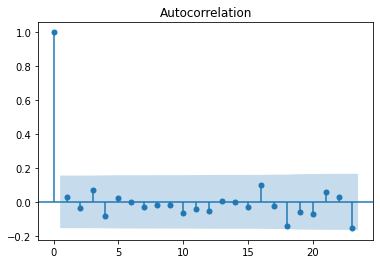

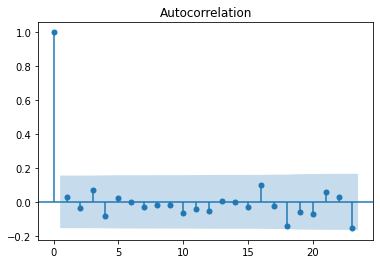

In [328]:
sm.graphics.tsa.plot_acf(Arima_model[0].resid())

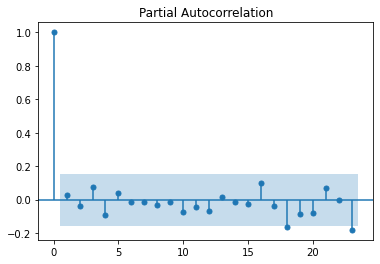

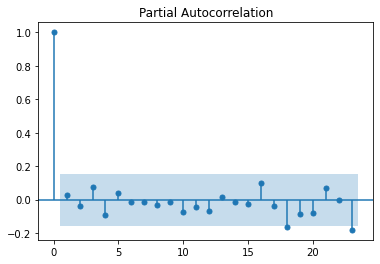

In [329]:
sm.graphics.tsa.plot_pacf(Arima_model[0].resid())

<AxesSubplot:ylabel='Density'>

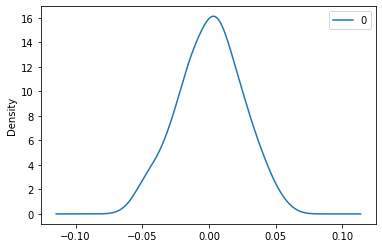

In [330]:
hedgeresid=pd.DataFrame(Arima_model[0].resid())
hedgeresid.plot(kind='kde')

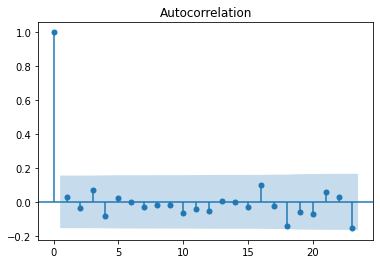

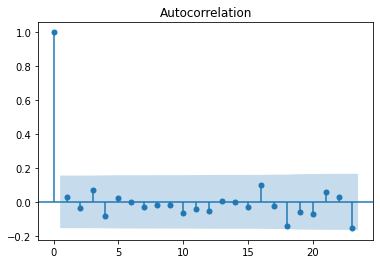

In [562]:
sm.graphics.tsa.plot_acf(Arima_model[0].resid()/np.std(Arima_model[0].resid()))

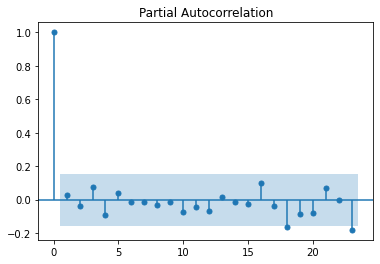

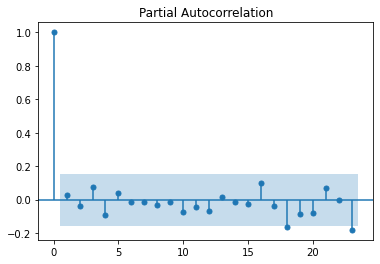

In [564]:
sm.graphics.tsa.plot_pacf(Arima_model[0].resid()/np.std(Arima_model[0].resid()))

In [563]:
!pip install arch

In [333]:
from arch import arch_model

In [340]:
_garch_model = arch_model(Arima_model[0].resid()/np.std(Arima_model[0].resid()), mean='Zero', p=1, q=1)
_garch_result = _garch_model.fit(disp = 'off')
print(_garch_result.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.006
Vol Model:                      GARCH   Log-Likelihood:               -225.909
Distribution:                  Normal   AIC:                           457.818
Method:            Maximum Likelihood   BIC:                           467.043
                                        No. Observations:                  160
Date:                Tue, Aug 09 2022   Df Residuals:                      160
Time:                        16:41:22   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      5.2446e-03  1.251e-02      0.419      0.675 

NameError: name '_garch_result' is not defined

In [625]:
_garch_result.aic

457.8176309788707

In [644]:
p=[]
q=[]
aic=[]
aictable=pd.DataFrame()
for i in range(1,10):
    for u in range(1,10):
        _garch_model = arch_model(Arima_model[0].resid()/np.std(Arima_model[0].resid()), mean='Zero', p=1+i, q=1+u)
        _garch_result = _garch_model.fit(disp = 'off')
        print("order for p {}, order for q {}, and the AIC {}".format(1+i,1+u,_garch_result.aic ))
        p.append(i)
        q.append(u)
        aic.append(_garch_result.aic)

order for p 2, order for q 2, and the AIC 461.81400518231135
order for p 2, order for q 3, and the AIC 463.81767919594273
order for p 2, order for q 4, and the AIC 464.5461091795974
order for p 2, order for q 5, and the AIC 467.830488783393
order for p 2, order for q 6, and the AIC 468.54610896214166
order for p 2, order for q 7, and the AIC 471.78791567716144
order for p 2, order for q 8, and the AIC 473.8201019731987
order for p 2, order for q 9, and the AIC 475.80120649135335
order for p 2, order for q 10, and the AIC 477.66245762270626
order for p 3, order for q 2, and the AIC 464.1035962967036
order for p 3, order for q 3, and the AIC 460.6512928500472
order for p 3, order for q 4, and the AIC 462.64524761657583
order for p 3, order for q 5, and the AIC 464.64524772238684
order for p 3, order for q 6, and the AIC 471.8181085832733
order for p 3, order for q 7, and the AIC 473.8284032279946
order for p 3, order for q 8, and the AIC 475.2171789102261
order for p 3, order for q 9, an

In [652]:
aic.argsort()

array([10,  0, 19, 11,  1, 46,  9, 20, 37,  2, 12, 36, 55, 18, 21, 27, 45,
       40, 38,  3, 64, 22,  4, 49, 28, 73, 54, 41, 39, 47, 29, 58, 50, 63,
       72, 74, 42, 56, 48,  5, 13, 30, 76, 16, 67, 59, 51, 75, 65, 43, 57,
        6, 14, 25, 31, 23, 77, 68, 60, 52, 66, 15, 44,  7, 32, 78, 53, 69,
       61,  8, 24, 33, 79, 62, 70, 17, 34, 26, 80, 71, 35])

In [654]:
aic=np.array(aic)

p=np.array(p)
q=np.array(q)
print(aic[35])
print(p[35])
print(q[35])

482.09130418879477
4
9


In [623]:
p[0]

0

In [346]:
Arima_model[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  160
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                 362.102
Date:                           Tue, 09 Aug 2022   AIC                           -682.205
Time:                                   17:14:51   BIC                           -618.293
Sample:                                        0   HQIC                          -656.245
                                           - 160                                         
Covariance Type:                             opg                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Factor - Low Risk                    0.0563      0.104      0.543      0.587      -0.147       0.259
Factor - Value vs Growth            -0.4885      0.138     -3.531      0.000      -0.760      -0.217
Factor - Fixed Income Carry          0.0139      0.124      0.113      0.910      -0.228       0.256
Factor - Local Equity                0.1039      0.122      0.849      0.396      -0.136       0.344
Factor - Trend Following            -0.0568      0.084     -0.678      0.498      -0.221       0.107
Factor - Commodities                -0.2530      0.130     -1.949      0.051      -0.507       0.001
Factor - Equity                     -0.0057      0.057     -0.101      0.919      -0.117       0.105
Factor - Foreign Exchange Carry      0.0735      0.093      0.789      0.430      -0.109       0.256
Factor - Small Cap                   0.0206      0.155      0.133      0.894      -0.283       0.325
Factor - Emerging Markets           -0.2052      0.117     -1.760      0.078      -0.434       0.023
Factor - Foreign Currency           -0.0203      0.115     -0.177      0.860      -0.245       0.204
Factor - Local Inflation            -0.0656      0.078     -0.839      0.402      -0.219       0.088
Factor - Equity Short Volatility     0.1326      0.097      1.372      0.170      -0.057       0.322
Factor - Credit                      0.0802      0.113      0.711      0.477      -0.141       0.301
Factor - Interest Rates             -0.2356      0.230     -1.023      0.306      -0.687       0.216
Factor - Crowding                   -0.0496      0.206     -0.240      0.810      -0.454       0.355
Factor - Momentum                    0.0973      0.101      0.963      0.335      -0.101       0.295
Factor - Quality                    -0.3311      0.211     -1.571      0.116      -0.744       0.082
ma.L1                               -0.9211      0.052    -17.792      0.000      -1.023      -0.820
ma.S.L4                             -0.9041      0.075    -12.039      0.000      -1.051      -0.757
sigma2                               0.0005   7.44e-05      6.739      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 1.09
Prob(Q):                              0.73   Prob(JB):                         0.58
Heteroskedasticity (H):               0.75   Skew:                            -0.07
Prob(H) (two-sided):                  0.30   Kurtosis:                         2.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

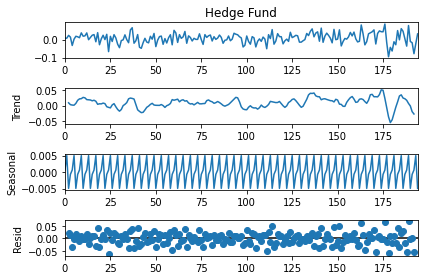

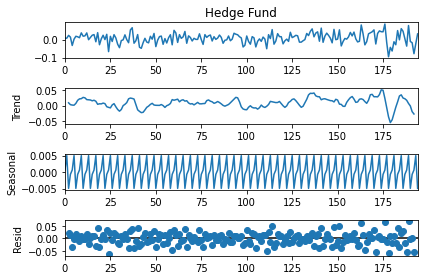

In [362]:
from statsmodels.tsa.seasonal import seasonal_decompose
(seasonal_decompose(returnsant['Hedge Fund'],model='a',period=4)).plot()

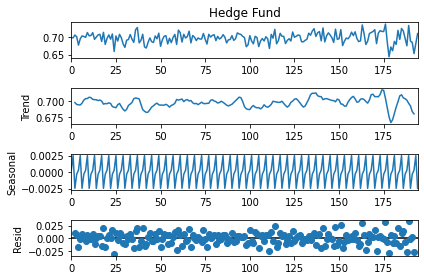

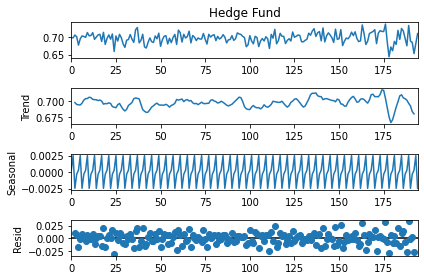

In [381]:
seasonal_decompose(np.log(returnsant['Hedge Fund']+2),model='a',period=4).plot()

In [498]:
seasonality=seasonal_decompose(returnsant['Hedge Fund'],model='a',period=4).seasonal

In [501]:
trend=seasonal_decompose(returnsant['Hedge Fund'],model='a',period=4).trend

In [526]:
seasonality.isnull() 

0      False
1      False
2      False
3      False
4      False
       ...  
190    False
191    False
192    False
193    False
194    False
Name: seasonal, Length: 195, dtype: bool

In [502]:
trend.fillna(0)

0      0.000000
1      0.000000
2      0.008813
3      0.002975
4      0.001675
         ...   
190   -0.001250
191   -0.019288
192   -0.026700
193    0.000000
194    0.000000
Name: trend, Length: 195, dtype: float64

In [385]:
copyreturnsant=returnsant

In [434]:
copyresid=Arima_model[0].resid()

In [435]:
newresid=Arima_model[0].resid()/np.std(Arima_model[0].resid())

In [386]:
for feature in returnsant.columns:   
    returnsant[feature]=returnsant[feature] - seasonal_decompose(returnsant[feature],model='a',period=4).seasonal

In [503]:
for feature in returnsant.columns:   
    returnsant[feature]=returnsant[feature] - seasonal_decompose(returnsant[feature],model='a',period=4).trend

In [504]:
def predictARMA_GARCH(n_iterations,params,alpha,beta,omega):
    armapredicts=np.zeros(n_iterations)
    var=np.zeros(n_iterations)
    res=np.zeros(n_iterations)
    res[0]=Arima_model[0].resid()[159]
    # inital condition
    var[0]=np.sqrt(252*40)*np.std(newresid[159])
    armapredicts[0]=(returnsant['Hedge Fund'][159])
    
    for i in range(1,n_iterations):
        noise = np.random.normal(0,1,1)
        var[i]=np.sqrt(alpha * (res[i-1])**2 + beta*(var[i-1]) + omega)
        #print(var[i])
        #print(returnsant.iloc[159+i,1:18].values.reshape(-1,1).T.shape)
        #print(params[0:17].values.reshape(-1,1).shape)
        armapredicts[i]= params[18]*res[i-1]+returnsant.iloc[159+i-1,1:18].values.reshape(-1,1).T.dot(params[0:17].values.reshape(-1,1)) + var[i-i]*noise
        #print(armapredicts[i])
        res[i]=abs(returnsant['Hedge Fund'][159+i] - armapredicts[i])
        #print(res[i])
    return armapredicts

In [508]:
projection=predictARMA_GARCH(34, Arima_model[0].params(),6.84e-13, 0.992, 5.24e-3)

In [506]:
returnsant['Hedge Fund'].tail(40)

155   -0.006516
156   -0.003278
157    0.010648
158   -0.002629
159    0.022684
160   -0.006091
161   -0.029064
162   -0.024004
163    0.061759
164    0.013384
165   -0.046677
166   -0.013466
167    0.016647
168    0.003584
169    0.003686
170    0.031984
171   -0.051641
172    0.006784
173    0.009661
174   -0.000316
175   -0.003478
176    0.064403
177   -0.014524
178   -0.055637
179    0.011731
180   -0.019067
181    0.008276
182   -0.018216
183    0.040009
184   -0.031853
185    0.022898
186    0.028159
187   -0.015953
188   -0.053516
189    0.067661
190   -0.003729
191    0.002772
192   -0.052628
193         NaN
194         NaN
Name: Hedge Fund, dtype: float64

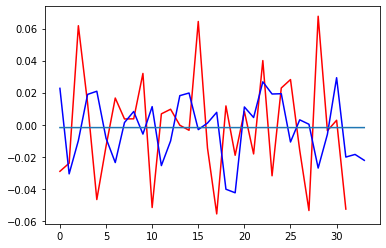

In [532]:
plt.plot(np.arange(0,34),returnsant['Hedge Fund'].tail(34),c='r')
plt.plot(projection,c='b')
plt.plot(mean)

In [510]:
predictarray=[]
MCiter=10000
for i in range(MCiter):
    predictarray.append(predictARMA_GARCH(34, Arima_model[0].params(),6.84e-13, 0.992, 5.24e-3))
    

In [511]:
predictarray=np.array(predictarray)

In [512]:
predictarray.shape = (34,10000)

In [513]:
mean=np.zeros(34)
for i in range(0,predictarray.shape[1]):
    mean += predictarray[:,i]
mean=mean/10000

In [392]:
Arima_model[0].params()

Factor - Low Risk                   0.056261
Factor - Value vs Growth           -0.488509
Factor - Fixed Income Carry         0.013948
Factor - Local Equity               0.103867
Factor - Trend Following           -0.056774
Factor - Commodities               -0.252961
Factor - Equity                    -0.005749
Factor - Foreign Exchange Carry     0.073525
Factor - Small Cap                  0.020618
Factor - Emerging Markets          -0.205167
Factor - Foreign Currency          -0.020273
Factor - Local Inflation           -0.065587
Factor - Equity Short Volatility    0.132603
Factor - Credit                     0.080193
Factor - Interest Rates            -0.235597
Factor - Crowding                  -0.049606
Factor - Momentum                   0.097278
Factor - Quality                   -0.331069
ma.L1                              -0.921109
ma.S.L4                            -0.904100
sigma2                              0.000501
dtype: float64

In [490]:
Arima_model[0].resid()

0      0.002631
1      0.006026
2      0.008948
3     -0.001862
4     -0.049489
         ...   
155    0.006408
156   -0.000053
157    0.027597
158    0.017271
159    0.029094
Length: 160, dtype: float64

In [529]:
import pmdarima as pm
from pmdarima import model_selection
est = pm.ARIMA(order=(1, 1, 2),
               seasonal_order=(0, 1, 1, 12),
               suppress_warnings=True)
cv = model_selection.SlidingWindowForecastCV(window_size=150, step=4, h=4)
predictions = model_selection.cross_val_predict(
    est, copyreturnsant['Hedge Fund'][0:160].dropna(), cv=cv, verbose=2, averaging="median")

[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................


In [541]:
model_selection.SlidingWindowForecastCV?

Init signature: model_selection.SlidingWindowForecastCV(h=1, step=1, window_size=None)
Docstring:     
Use a sliding window to perform cross validation

This approach to CV slides a window over the training samples while using
several future samples as a test set. While similar to the
:class:`RollingForecastCV`, it differs in that the train set does not grow,
but rather shifts.

Parameters
----------
h : int, optional (default=1)
    The forecasting horizon, or the number of steps into the future after
    the last training sample for the test set.

step : int, optional (default=1)
    The size of step taken between training folds.

window_size : int or None, optional (default=None)
    The size of the rolling window to use. If None, a rolling window of
    size n_samples // 5 will be used.

Examples
--------
With a step size of one and a forecasting horizon of one, the training size
will grow by 1 for each step, and the test index will be 1 + the last
training index. Notice the slidin

In [610]:
import pmdarima as pm
from pmdarima import model_selection
est = Arima_model[0]
cv = model_selection.SlidingWindowForecastCV(window_size=24, step=2, h=2)
predictions1 = model_selection.cross_val_predict(
    est, copyreturnsant['Hedge Fund'][0:194].dropna(), cv=cv, verbose=2, averaging="median")

[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=3 ..........................................................
[CV] fold=4 ..........................................................
[CV] fold=5 ..........................................................
[CV] fold=6 ..........................................................
[CV] fold=7 ..........................................................
[CV] fold=8 ..........................................................
[CV] fold=9 ..........................................................
[CV] fold=10 .........................................................
[CV] fold=11 .........................................................
[CV] fold=12 .........................................................
[CV] fold=13 .........................................................
[CV] f

In [611]:
len(predictions1)

166

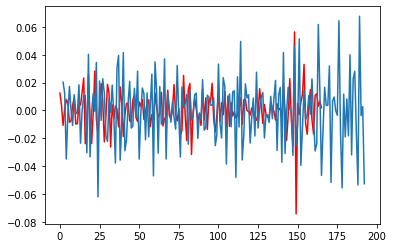

In [612]:
plt.plot(predictions1,c='r')
plt.plot(returnsant['Hedge Fund'].dropna())

In [535]:
Arima_model[0]

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 4),
      suppress_warnings=True, with_intercept=False)

In [530]:
automodel=auto_arima(copyreturnsant['Hedge Fund'][0:160].dropna(),copyreturnsant.drop('Hedge Fund',axis=1)[0:160].dropna(), start_p=1, start_q=1, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=4, seasonal=True, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)



from matplotlib import pyplot as plt

print("pmdarima version: %s" % pm.__version__)

cv = model_selection.SlidingWindowForecastCV(window_size=40, step=4, h=4)
predictions = model_selection.cross_val_predict(
    automodel, copyreturnsant['Hedge Fund'][0:160].dropna(), cv=cv, verbose=2, averaging="median")

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[4]             : AIC=-691.388, Time=0.59 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=-519.283, Time=0.20 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=-640.396, Time=0.69 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=-736.159, Time=0.79 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=-664.166, Time=0.57 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=-737.614, Time=0.93 sec
 ARIMA(0,1,1)(1,1,0)[4]             : AIC=-721.984, Time=0.69 sec
 ARIMA(0,1,1)(2,1,1)[4]             : AIC=-734.151, Time=1.13 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=-739.140, Time=1.16 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=-738.163, Time=1.19 sec
 ARIMA(0,1,1)(2,1,2)[4]             : AIC=-736.973, Time=1.23 sec
 ARIMA(0,1,1)(1,1,3)[4]             : AIC=-737.190, Time=1.61 sec
 ARIMA(0,1,1)(0,1,3)[4]             : AIC=-736.182, Time=1.57 sec
 ARIMA(0,1,1)(2,1,3)[4]             : AIC=-733.034, Time=1.57 sec
 ARIMA(0,1,0)(1,1,2)[4]          

In [2]:
automodel.resid()

NameError: name 'automodel' is not defined

In [539]:
copyreturnsant.isnull().sum()

Hedge Fund                          4
Factor - Low Risk                   4
Factor - Value vs Growth            4
Factor - Fixed Income Carry         4
Factor - Local Equity               4
Factor - Trend Following            4
Factor - Commodities                4
Factor - Equity                     4
Factor - Foreign Exchange Carry     4
Factor - Small Cap                  4
Factor - Emerging Markets           4
Factor - Foreign Currency           4
Factor - Local Inflation            4
Factor - Equity Short Volatility    4
Factor - Credit                     4
Factor - Interest Rates             4
Factor - Crowding                   4
Factor - Momentum                   4
Factor - Quality                    4
dtype: int64

In [123]:
returnsant

,Hedge Fund,Factor - Low Risk,Factor - Value vs Growth,Factor - Fixed Income Carry,Factor - Local Equity,Factor - Trend Following,Factor - Commodities,Factor - Equity,Factor - Foreign Exchange Carry,Factor - Small Cap,Factor - Emerging Markets,Factor - Foreign Currency,Factor - Local Inflation,Factor - Equity Short Volatility,Factor - Credit,Factor - Interest Rates,Factor - Crowding,Factor - Momentum,Factor - Quality
0,0.0088,-0.027273,-0.012632,0.006403,-0.004653,0.027924,-0.003037,0.028032,-0.003735,0.025687,0.022615,-0.028750,0.009925,0.008125,0.019915,-0.006530,0.000020,0.030207,-0.000626
1,0.0083,0.036038,0.012010,-0.021316,0.012622,0.008689,-0.021246,0.005813,-0.005763,-0.005889,0.023366,0.005920,-0.005564,0.016747,0.003766,-0.002498,-0.000645,-0.014214,-0.002882
2,0.0242,0.000317,-0.001646,-0.006682,0.012469,0.026956,-0.002117,0.013999,-0.057169,0.012512,-0.039254,0.004665,0.015684,0.005389,0.000358,-0.014418,-0.019313,0.008646,0.009902
3,0.0146,-0.003192,0.002147,0.020273,0.004506,0.064467,0.006392,0.013055,0.005360,-0.007250,-0.006414,-0.021774,0.026725,0.006107,0.008849,-0.013622,-0.017431,0.017130,0.008526
4,-0.0325,0.015825,0.019188,0.029589,-0.011379,-0.026691,0.006959,-0.052638,-0.012393,-0.015368,-0.054605,-0.036699,0.016301,0.006757,-0.000345,0.005999,0.011866,0.001438,-0.001415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-0.0099,0.003132,0.005199,-0.015835,-0.005918,-0.012823,-0.027131,-0.016673,-0.045338,-0.013525,0.021728,0.015144,0.044356,-0.004585,-0.020208,0.012773,-0.002836,0.042852,0.020969
191,-0.0172,0.052792,0.044041,0.034074,0.016922,0.003272,0.005509,0.037257,-0.009623,-0.013187,-0.008817,-0.013544,-0.030489,0.018996,0.005231,-0.005114,0.028112,-0.014906,0.019418
192,-0.0787,0.020276,-0.000972,0.006461,0.055675,0.012236,0.049740,-0.045863,-0.003039,-0.025739,0.013059,0.000052,0.038181,0.007526,-0.004313,-0.013568,0.024205,-0.048792,-0.012684
193,-0.0222,-0.018272,0.011823,0.000429,0.025401,0.014189,0.046090,-0.026258,0.032276,0.025021,-0.040556,0.000475,0.027307,0.029857,-0.025138,-0.009306,-0.003054,0.005495,-0.009323


In [137]:
predictions=np.array(predictions)

In [138]:
(predictions).shape = ( 20,19)

In [139]:
predictions=pd.DataFrame(predictions)

In [141]:
predictions.columns=returnsant.columns

In [142]:
predictions

,Hedge Fund,Factor - Low Risk,Factor - Value vs Growth,Factor - Fixed Income Carry,Factor - Local Equity,Factor - Trend Following,Factor - Commodities,Factor - Equity,Factor - Foreign Exchange Carry,Factor - Small Cap,Factor - Emerging Markets,Factor - Foreign Currency,Factor - Local Inflation,Factor - Equity Short Volatility,Factor - Credit,Factor - Interest Rates,Factor - Crowding,Factor - Momentum,Factor - Quality
0,8.722815e-03,0.008860,0.008647,0.008337,0.009025,0.008860,0.008702,0.008685,0.008954,0.008571,0.008744,0.008864,0.008411,0.008837,0.008827,0.008757,0.008393,0.009155,0.008161
1,9.008651e-03,-0.024012,-0.027695,-0.026401,-0.025636,-0.026556,-0.025145,-0.027483,-0.025372,-0.027511,-0.026146,-0.025379,-0.027130,-0.026374,-0.026793,-0.025768,-0.026944,-0.027016,-0.026778
2,-2.448106e-02,-0.027581,-0.012184,-0.012649,-0.012434,-0.012278,-0.012599,-0.012165,-0.012926,-0.012281,-0.012606,-0.012580,-0.012153,-0.012788,-0.012453,-0.012554,-0.012309,-0.012570,-0.012632
3,-1.283243e-02,-0.011972,-0.012815,0.007130,0.006243,0.005961,0.006331,0.006521,0.007085,0.006717,0.006713,0.006090,0.006899,0.005764,0.006995,0.007023,0.006141,0.006769,0.006559
4,5.955629e-03,0.007187,0.005942,0.006184,-0.004377,-0.004600,-0.004696,-0.004795,-0.004203,-0.004671,-0.005024,-0.004424,-0.004528,-0.004768,-0.004413,-0.004816,-0.004180,-0.004624,-0.005007
5,-4.292904e-03,-0.004604,-0.005094,-0.003842,-0.005011,0.027514,0.027844,0.028008,0.026889,0.027786,0.027653,0.027865,0.027721,0.027594,0.027675,0.027959,0.027531,0.027715,0.027286
6,2.817059e-02,0.027782,0.027458,0.027352,0.027668,0.028208,-0.002715,-0.003501,-0.003292,-0.003119,-0.002653,-0.003587,-0.002617,-0.002939,-0.003850,-0.003027,-0.002392,-0.003562,-0.003479
7,-2.684137e-03,-0.002967,-0.003177,-0.002970,-0.003604,-0.002617,-0.003779,0.027740,0.027918,0.027864,0.027488,0.028139,0.027979,0.027917,0.027843,0.027934,0.027779,0.027959,0.027773
8,2.794005e-02,0.027606,0.028212,0.027814,0.027670,0.027749,0.027941,0.028251,-0.003745,-0.003461,-0.004116,-0.003657,-0.003805,-0.003907,-0.003795,-0.003673,-0.003785,-0.003632,-0.003964
9,-3.584455e-03,-0.003826,-0.003613,-0.003894,-0.003694,-0.003964,-0.003465,-0.003484,-0.004190,0.026024,0.025732,0.025955,0.025888,0.025838,0.025968,0.025584,0.025906,0.025814,0.025782


In [143]:
returnsant.append(predictions)

,Hedge Fund,Factor - Low Risk,Factor - Value vs Growth,Factor - Fixed Income Carry,Factor - Local Equity,Factor - Trend Following,Factor - Commodities,Factor - Equity,Factor - Foreign Exchange Carry,Factor - Small Cap,Factor - Emerging Markets,Factor - Foreign Currency,Factor - Local Inflation,Factor - Equity Short Volatility,Factor - Credit,Factor - Interest Rates,Factor - Crowding,Factor - Momentum,Factor - Quality
0,8.800000e-03,-0.027273,-0.012632,0.006403,-0.004653,0.027924,-0.003037,0.028032,-0.003735,0.025687,0.022615,-0.028750,0.009925,0.008125,0.019915,-0.006530,0.000020,0.030207,-0.000626
1,8.300000e-03,0.036038,0.012010,-0.021316,0.012622,0.008689,-0.021246,0.005813,-0.005763,-0.005889,0.023366,0.005920,-0.005564,0.016747,0.003766,-0.002498,-0.000645,-0.014214,-0.002882
2,2.420000e-02,0.000317,-0.001646,-0.006682,0.012469,0.026956,-0.002117,0.013999,-0.057169,0.012512,-0.039254,0.004665,0.015684,0.005389,0.000358,-0.014418,-0.019313,0.008646,0.009902
3,1.460000e-02,-0.003192,0.002147,0.020273,0.004506,0.064467,0.006392,0.013055,0.005360,-0.007250,-0.006414,-0.021774,0.026725,0.006107,0.008849,-0.013622,-0.017431,0.017130,0.008526
4,-3.250000e-02,0.015825,0.019188,0.029589,-0.011379,-0.026691,0.006959,-0.052638,-0.012393,-0.015368,-0.054605,-0.036699,0.016301,0.006757,-0.000345,0.005999,0.011866,0.001438,-0.001415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2.003199e-02,0.019714,0.019901,0.019934,0.019782,0.019742,0.019924,0.019912,0.019579,0.019980,0.019896,0.019570,0.019588,0.020269,0.019903,-0.006556,-0.006517,-0.006548,-0.006595
16,-6.515945e-03,-0.006583,-0.006559,-0.006530,-0.006524,-0.006558,-0.006519,-0.006555,-0.006575,-0.006529,-0.006533,-0.006533,-0.006550,-0.006602,-0.006552,-0.006504,0.000020,0.000032,0.000018
17,6.326608e-07,0.000024,0.000024,0.000018,0.000024,0.000008,0.000028,0.000023,0.000013,0.000025,-0.000022,0.000058,0.000005,0.000037,0.000008,0.000022,0.000024,0.031267,0.030326
18,3.051724e-02,0.030864,0.030602,0.030540,0.031282,0.030383,0.030383,0.030641,0.030439,0.030778,0.030794,0.030352,0.030826,0.030526,0.030732,0.030093,0.031034,0.030127,-0.000621
